# Using core classes

This notebook aims to illustrate the `VertexAtom` and `Hybridization` classes and the computed values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pychemcurv

## Compute data for a range of pyrA values

Compute the pyramidalization angle for a series of perfect pyramid of known pyramidalization angle.

In [2]:
l = 1.4
xyz = ""
data = list()
for iline, theta in enumerate(range(90, 90 + 31, 1), 1):
    
    va = pychemcurv.VertexAtom.from_pyramid(l, theta)
    hyb = pychemcurv.Hybridization(va.pyrA)
    
    aline = dict(theta=theta)
    aline.update(va.as_dict(radians=False))
    aline.update(hyb.as_dict())
    data.append(aline)

    xyz += va.write_file(filename=None)

with open("traj.xyz", "w") as f:
    f.write(xyz)

In [6]:
df = pd.DataFrame(data)
df.head()

,theta,pyrA,spherical_curvature,angular_defect,improper,pyr_distance,atom_A,star_A,n_star_A,hybridization,n,m,c_pi^2,lambda_pi^2
0,90,0.0,8.747477e-17,-5.088887e-14,7.016709e-15,8.572528e-17,"[0.0, 0.0, -8.572527594031472e-17]","[[1.4, 0.0, 0.0], [-0.6999999999999996, 1.2124...",3,2.000000,2.000000,0.000000,0.000000,1.000000
1,91,1.0,2.493201e-02,9.066696e-02,-1.999391e+00,2.443337e-02,"[0.0, 0.0, 0.02443336901219686]","[[1.3997867732189477, 0.0, 0.0], [-0.699893386...",3,2.001829,2.001829,0.000610,0.000609,0.999391
2,92,2.0,4.985642e-02,3.623923e-01,-3.995138e+00,4.885930e-02,"[0.0, 0.0, 0.04885929538350133]","[[1.399147157826734, 0.0, 0.0], [-0.6995735789...",3,2.007335,2.007335,0.002445,0.002439,0.997561
3,93,3.0,7.476565e-02,8.143534e-01,-5.983640e+00,7.327034e-02,"[0.0, 0.0, 0.07327033874012137]","[[1.3980813486564032, 0.0, 0.0], [-0.699040674...",3,2.016570,2.016570,0.005523,0.005493,0.994507
4,94,4.0,9.965211e-02,1.445193e+00,-7.961385e+00,9.765906e-02,"[0.0, 0.0, 0.09765906324177548]","[[1.3965896703637537, 0.0, 0.0], [-0.698294835...",3,2.029628,2.029628,0.009876,0.009780,0.990220


In [4]:
latex = df.to_latex(
    index=False,
    escape=False,
    columns=["theta", "pyrA", "c_pi^2", "lambda_pi^2", "m", "n", "hybridization"],
    formatters={"lambda_pi^2": lambda x: "%8.3f" % x,
                "c_pi^2": lambda x: "%8.3f" % x,
                "m": lambda x: "%8.3f" % x,
                "hybridization": lambda x: "%8.3f" % x,
                "n": lambda x: "%8.3f" % x})
print(latex)

\begin{tabular}{rrrrrrr}
\toprule
 theta &  pyrA &   c_pi^2 & lambda_pi^2 &        m &        n & hybridization \\
\midrule
    90 &   0.0 &    0.000 &       1.000 &    0.000 &    2.000 &         2.000 \\
    91 &   1.0 &    0.001 &       0.999 &    0.001 &    2.002 &         2.002 \\
    92 &   2.0 &    0.002 &       0.998 &    0.002 &    2.007 &         2.007 \\
    93 &   3.0 &    0.005 &       0.995 &    0.006 &    2.017 &         2.017 \\
    94 &   4.0 &    0.010 &       0.990 &    0.010 &    2.030 &         2.030 \\
    95 &   5.0 &    0.015 &       0.985 &    0.016 &    2.047 &         2.047 \\
    96 &   6.0 &    0.022 &       0.978 &    0.023 &    2.068 &         2.068 \\
    97 &   7.0 &    0.030 &       0.970 &    0.031 &    2.093 &         2.093 \\
    98 &   8.0 &    0.040 &       0.960 &    0.041 &    2.123 &         2.123 \\
    99 &   9.0 &    0.050 &       0.950 &    0.053 &    2.158 &         2.158 \\
   100 &  10.0 &    0.062 &       0.938 &    0.066 &    2.199 &   

## Compute data for defined pyramid

### A perfect sp3 pyramid

In [5]:
va = pychemcurv.VertexAtom.from_pyramid(1.3, np.degrees(np.arccos(-1/3)), perturb=0)
print(va)
va.write_file(filename="mol.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper}")

pyrA: 19.4712 degrees
size of *(A): 3
Atom A:
[0.         0.         0.43333333]
Atoms B in *(A):
[[ 1.22565175  0.          0.        ]
 [-0.61282588  1.06144556  0.        ]
 [-0.61282588 -1.06144556  0.        ]]

pyr angle:    19.4712
pyr distance:     0.4333
angular defect:     0.5513
spherical curvature : 0.5128205128205127
improper angle: -0.6154797086703873


### A perfect sp2 atom

In [7]:
va = pychemcurv.VertexAtom.from_pyramid(1.3, 90, perturb=0)
print(va)
va.write_file(filename="mol_sp2.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 0.0000 degrees
size of *(A): 3
Atom A:
[ 0.00000000e+00  0.00000000e+00 -7.96020419e-17]
Atoms B in *(A):
[[ 1.3         0.          0.        ]
 [-0.65        1.12583302  0.        ]
 [-0.65       -1.12583302  0.        ]]

pyr angle:     0.0000
pyr distance:     0.0000
angular defect:    -0.0000
spherical curvature : 9.420359993441179e-17
improper angle:     0.0000


### A sp3 pyramid with random noize

Compute the same quantities for a sp3 pyramid but randomize the positions.

#### perturb by 1%

In [8]:
va = pychemcurv.VertexAtom.from_pyramid(1.3, np.degrees(np.arccos(-1/3)), perturb=0.01 * 2)
print(va)
va.write_file(filename="mol_r.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 19.1162 degrees
size of *(A): 3
Atom A:
[0.         0.         0.43333333]
Atoms B in *(A):
[[ 1.22129009  0.01469287 -0.01276197]
 [-0.60213464  1.08635482  0.01162588]
 [-0.62114492 -1.0775838   0.0159102 ]]

pyr angle:    19.1162
pyr distance:     0.4284
angular defect:     0.5331
spherical curvature : 0.5007199718109794
improper angle:    -0.5932


#### Perturb by 15%

Compute the same quantities for a sp3 pyramid but randomize the positions by 15%.

In [9]:
va = pychemcurv.VertexAtom.from_pyramid(1.4, np.degrees(np.arccos(-1/3)), perturb=0.15 * 2)
print(va)
va.write_file(filename="mol_r.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 21.7579 degrees
size of *(A): 3
Atom A:
[0.         0.         0.46666667]
Atoms B in *(A):
[[ 0.95989306 -0.01540445 -0.45777711]
 [-0.77093365  0.72865347  0.65981589]
 [-0.6272161  -0.8081634  -0.36054831]]

pyr angle:    21.7579
pyr distance:     0.4473
angular defect:     0.7792
spherical curvature : 0.6064029047208582
improper angle:    -1.1069


### Random rotation

Apply a random rotation and translation to the molecule, and check the results do not change.

In [10]:
# transformation matrix from qr decomposition of a random matrix
q ,r = np.linalg.qr(np.random.random((3, 3)))

# random translation vector
translation = np.random.uniform(-10, 10, 3)

# new coordinates
coords = np.vstack((va.a, va.star_a))
qcoords = np.dot(coords, q) + translation
print("qcoords = \n", qcoords)

va = pychemcurv.VertexAtom(qcoords[0], qcoords[1:])
va.write_file(filename="random.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

qcoords = 
 [[-6.19533811  6.55475663  2.12433194]
 [-6.89340087  7.68987711  2.10339987]
 [-6.08601051  5.78902266  1.3731461 ]
 [-5.17412737  7.33167219  1.83391231]]
pyr angle:    21.7579
pyr distance:     0.4473
angular defect:     0.7792
spherical curvature : 0.6064029047208608
improper angle:    -1.1069


## Hybridization

This class contains quantities computed from the pyramidalisation angle.

In [11]:
hyb = pychemcurv.Hybridization(18)

In [12]:
print(f"c_pi^2 = {hyb.c_pi**2:.4f}")
print(f"lambda_pi^2 = {hyb.lambda_pi**2:.4f}")

c_pi^2 = 0.2111
lambda_pi^2 = 0.7889


In [13]:
hyb.as_dict()

{'hybridization': 2.802983248181589,
 'n': 2.802983248181589,
 'm': 0.26766108272719624,
 'c_pi^2': 0.21114561800016823,
 'lambda_pi^2': 0.7888543819998319}

### with numpy

The `Hybridization` class can be used with numpy.

In [14]:
pyrA = np.linspace(0, 30, 12)
hyb = pychemcurv.Hybridization(pyrA)

In [15]:
hyb.c_pi ** 2

array([0.        , 0.00453835, 0.01823608, 0.0413444 , 0.07429295,
       0.11770697, 0.17243303, 0.23957508, 0.32054361, 0.41712183,
       0.53155439, 0.66666667])

In [16]:
hyb.lambda_pi ** 2

array([1.        , 0.99546165, 0.98176392, 0.9586556 , 0.92570705,
       0.88229303, 0.82756697, 0.76042492, 0.67945639, 0.58287817,
       0.46844561, 0.33333333])

In [17]:
hyb.as_dict()

{'hybridization': array([2.        , 2.01367713, 2.05572443, 2.12938243, 2.24076606,
        2.40023088, 2.62508428, 2.94516265, 3.41529438, 4.14687311,
        5.40415859, 8.        ]),
 'n': array([2.        , 2.01367713, 2.05572443, 2.12938243, 2.24076606,
        2.40023088, 2.62508428, 2.94516265, 3.41529438, 4.14687311,
        5.40415859, 8.        ]),
 'm': array([0.        , 0.00455904, 0.01857481, 0.04312748, 0.08025535,
        0.13341029, 0.20836143, 0.31505422, 0.47176479, 0.71562437,
        1.13471953, 2.        ]),
 'c_pi^2': array([0.        , 0.00453835, 0.01823608, 0.0413444 , 0.07429295,
        0.11770697, 0.17243303, 0.23957508, 0.32054361, 0.41712183,
        0.53155439, 0.66666667]),
 'lambda_pi^2': array([1.        , 0.99546165, 0.98176392, 0.9586556 , 0.92570705,
        0.88229303, 0.82756697, 0.76042492, 0.67945639, 0.58287817,
        0.46844561, 0.33333333])}

## Hybridization

Calculations of $c_\pi^2 / 3$ and $\lambda_\pi^2$ as a function of $pyrA$.

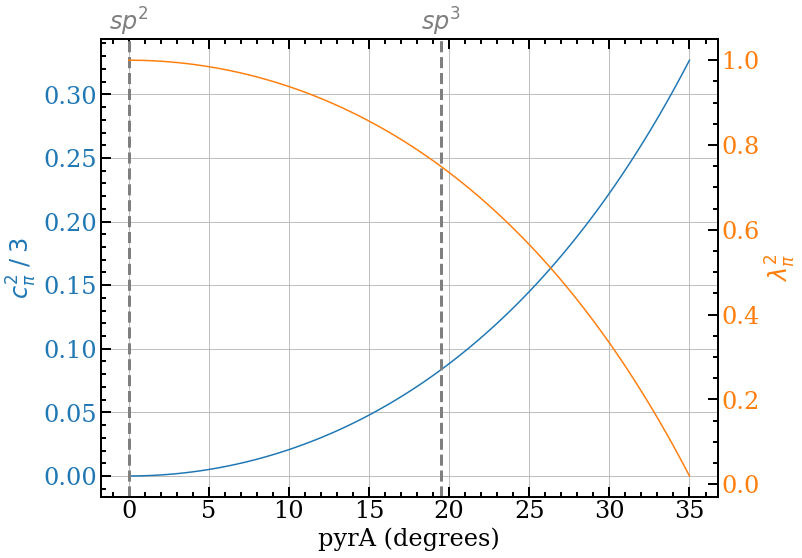

In [18]:
pyrA = np.linspace(0, 35, 100)
hybridization = pychemcurv.Hybridization(pyrA)

with plt.style.context("publi"):
    fig, ax1 = plt.subplots()
    
    ax1.plot(pyrA, hybridization.c_pi ** 2 / 3, label="$p_z$ weight in $\sigma$ orbitals")
    ax1.set_xlabel('pyrA (degrees)')
    ax1.set_ylabel('$c_\pi^2 \; / \; 3$', color="C0")
    ax1.tick_params(axis='y', labelcolor="C0")

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.plot(pyrA, hybridization.lambda_pi **2, color="C1", label="s weight in $\pi$ orbital")
    
    ax2.set_ylabel('$\lambda_\pi^2$', color="C1")
    ax2.tick_params(axis='y', labelcolor="C1")
    
    ax1.axvline(0, color="C7", ls="--", lw=3)
    ax1.axvline(19.4712, color="C7", ls="--", lw=3)
    ax1.text(0, 0.35, "$sp^2$", ha="center", color="C7")
    ax1.text(19.4712, 0.35, "$sp^3$", ha="center", color="C7")

    plt.grid(False)
    fig.tight_layout()
    plt.savefig("hybrid.png", dpi=300)
    